In [1]:
import json

# Load the packets.outliers.rlc.json file
with open("packets.outliers.rlc.json", "r") as file:
    packets = json.load(file)

# Dictionary to store RLC attempt counts and delays per SN
rlc_attempts_per_sn = {}

# Iterate through packets
for packet in packets:
    sn = packet.get("sn")  # Get SN (Sequence Number)
   

    # Calculate RLC delay
    rlc_in_t = packet.get("rlc.in_t")
    rlc_out_t = packet.get("rlc.out_t")
    if rlc_in_t is not None and rlc_out_t is not None:
        rlc_delay = (rlc_out_t - rlc_in_t) * 1e3 
    else:
        rlc_delay = None  

    # Count RLC attempts
    if "rlc.attempts" in packet:
        total_attempts = len(packet["rlc.attempts"])  # Count total RLC attempts
        repeated_attempts = sum(1 for attempt in packet["rlc.attempts"] if attempt.get("repeated", False))  # Count repeated RLC attempts
        unique_attempts = total_attempts - repeated_attempts  # Calculate unique attempts

        # Store results in dictionary
        rlc_attempts_per_sn[sn] = {
            "total_rlc_attempts": total_attempts,
            "repeated_rlc_attempts": repeated_attempts,
            "unique_rlc_attempts": unique_attempts,
            "rlc_delay_ms": rlc_delay
        }

# Print results for each SN
print(f"{'SN':<8} {'Total':<8} {'Repeated':<10} {'Unique':<8} {'RLC Delay (ms)':<15}")
print("=" * 55)
for sn, counts in rlc_attempts_per_sn.items():
    print(f"{sn:<8} {counts['total_rlc_attempts']:<8} {counts['repeated_rlc_attempts']:<10} {counts['unique_rlc_attempts']:<8} {counts['rlc_delay_ms']:.3f} ms")


SN       Total    Repeated   Unique   RLC Delay (ms) 
251      5        1          4        54.023 ms
262      11       7          4        163.350 ms
264      4        3          1        85.666 ms
793      3        0          3        40.104 ms
1143     6        3          3        105.556 ms
1306     6        3          3        105.437 ms
1469     6        3          3        105.269 ms
1916     5        2          3        103.162 ms
1917     4        3          1        100.044 ms
2041     6        3          3        104.881 ms
2740     6        3          3        101.204 ms
6340     6        3          3        105.934 ms
6903     9        5          4        120.616 ms
6904     4        3          1        100.540 ms
9718     5        1          4        61.367 ms
10021    7        4          3        119.964 ms
10022    5        4          1        122.385 ms
10852    6        3          3        102.878 ms
11891    6        3          3        102.922 ms
12024    7        4

In [1]:
import json

# Load the packets.outliers.rlc.json file
with open("packets.outliers.rlc.json", "r") as file:
    packets = json.load(file)

# Dictionary to store HARQ statistics per SN
harq_stats_per_sn = {}

# Process each packet
for packet in packets:
    sn = packet.get("sn", "Unknown")  # Get Sequence Number
    rlc_delay = (packet['rlc.out_t'] - packet['rlc.in_t']) * 1e3  # Convert to milliseconds

    total_harq_attempts = 0
    harq_retransmissions = 0

    if "rlc.attempts" in packet:
        for rlc_attempt in packet["rlc.attempts"]:
            if "mac.attempts" in rlc_attempt:
                total_harq_attempts += sum(1 for attempt in rlc_attempt["mac.attempts"] if attempt.get("acked", False))
                harq_retransmissions += sum(attempt.get("hqround", 0) for attempt in rlc_attempt["mac.attempts"])

    # Store results in dictionary
    harq_stats_per_sn[sn] = {
        "total_mac_transmissions": total_harq_attempts,
        "harq_retransmissions": harq_retransmissions,
        "rlc_delay_ms": rlc_delay
    }

# Print results in a structured format
print(f"{'SN':<8} {'MAC Transmissions':<18} {'HARQ':<12} {'RLC Delay (ms)':<15}")
print("=" * 55)
for sn, stats in harq_stats_per_sn.items():
    print(f"{sn:<8} {stats['total_mac_transmissions']:<18} {stats['harq_retransmissions']:<12} {stats['rlc_delay_ms']:.3f} ms")


SN       MAC Transmissions  HARQ         RLC Delay (ms) 
251      4                  0            54.023 ms
262      7                  3            163.350 ms
264      3                  1            85.666 ms
793      3                  6            40.104 ms
1143     5                  1            105.556 ms
1306     5                  1            105.437 ms
1469     5                  1            105.269 ms
1916     4                  1            103.162 ms
1917     3                  1            100.044 ms
2041     5                  1            104.881 ms
2740     5                  1            101.204 ms
6340     5                  1            105.934 ms
6903     6                  1            120.616 ms
6904     3                  1            100.540 ms
9718     4                  1            61.367 ms
10021    5                  2            119.964 ms
10022    3                  2            122.385 ms
10852    5                  1            102.878 ms
11891    5 

In [2]:
import json

# Load the packets.outliers.rlc.json file
with open("packets.outliers.rlc.json", "r") as file:
    packets = json.load(file)

# Dictionary to store RLC attempt counts per SN
rlc_attempts_per_sn = {}

# Iterate through packets
for packet in packets:
    sn = packet.get("sn")  # Get SN (Sequence Number)
    if sn is None:
        continue  # Skip if SN is missing

    if "rlc.attempts" in packet:
        total_attempts = len(packet["rlc.attempts"])  # Count total RLC attempts
        repeated_attempts = sum(1 for attempt in packet["rlc.attempts"] if attempt.get("repeated", False))  # Count repeated RLC attempts
        unique_attempts = total_attempts - repeated_attempts  # Calculate unique attempts

        # Store results in dictionary
        rlc_attempts_per_sn[sn] = {
            "total_rlc_attempts": total_attempts,
            "repeated_rlc_attempts": repeated_attempts,
            "unique_rlc_attempts": unique_attempts
        }

# Print results for each SN
for sn, counts in rlc_attempts_per_sn.items():
    print(f"SN: {sn} | Total: {counts['total_rlc_attempts']} | Repeated: {counts['repeated_rlc_attempts']} | Unique: {counts['unique_rlc_attempts']}")


SN: 251 | Total: 5 | Repeated: 1 | Unique: 4
SN: 262 | Total: 11 | Repeated: 7 | Unique: 4
SN: 264 | Total: 4 | Repeated: 3 | Unique: 1
SN: 793 | Total: 3 | Repeated: 0 | Unique: 3
SN: 1143 | Total: 6 | Repeated: 3 | Unique: 3
SN: 1306 | Total: 6 | Repeated: 3 | Unique: 3
SN: 1469 | Total: 6 | Repeated: 3 | Unique: 3
SN: 1916 | Total: 5 | Repeated: 2 | Unique: 3
SN: 1917 | Total: 4 | Repeated: 3 | Unique: 1
SN: 2041 | Total: 6 | Repeated: 3 | Unique: 3
SN: 2740 | Total: 6 | Repeated: 3 | Unique: 3
SN: 6340 | Total: 6 | Repeated: 3 | Unique: 3
SN: 6903 | Total: 9 | Repeated: 5 | Unique: 4
SN: 6904 | Total: 4 | Repeated: 3 | Unique: 1
SN: 9718 | Total: 5 | Repeated: 1 | Unique: 4
SN: 10021 | Total: 7 | Repeated: 4 | Unique: 3
SN: 10022 | Total: 5 | Repeated: 4 | Unique: 1
SN: 10852 | Total: 6 | Repeated: 3 | Unique: 3
SN: 11891 | Total: 6 | Repeated: 3 | Unique: 3
SN: 12024 | Total: 7 | Repeated: 4 | Unique: 3
SN: 12025 | Total: 5 | Repeated: 4 | Unique: 1
SN: 14027 | Total: 6 | Repeated

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the packets.json file
with open("packets.json", "r") as file:
    packets = json.load(file)

# Extract RLC delays
rlc_delays = []
for packet in packets:
    try:
        rlc_delay = (packet['rlc.out_t'] - packet['rlc.in_t']) * 1e3  # Convert to milliseconds
        rlc_delays.append(rlc_delay)
    except KeyError:
        continue  # Skip packets with missing timestamps

# Convert list to numpy array
rlc_delays = np.array(rlc_delays)

# Function to compute autocorrelation
def autocorrelation(x, lag):
    n = len(x)
    x_mean = np.mean(x)
    numerator = np.sum((x[:n-lag] - x_mean) * (x[lag:] - x_mean))
    denominator = np.sum((x - x_mean) ** 2)
    return numerator / denominator

# Compute autocorrelation for different lags
lags = np.arange(1, 50)  # Lag values from 1 to 50
autocorr_values = [autocorrelation(rlc_delays, lag) for lag in lags]

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(lags, autocorr_values, basefmt=" ")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of RLC Delay (Packets.json)")
plt.grid(True)
plt.show()

# Function to compute partial autocorrelation using the Yule-Walker equations
def partial_autocorrelation(x, max_lag):
    pacf_values = [1.0]  # PACF(0) is always 1
    for lag in range(1, max_lag + 1):
        if lag == 1:
            pacf_values.append(autocorrelation(x, lag))
        else:
            pacf_values.append(autocorrelation(x - pacf_values[-1] * np.roll(x, -1), lag))
    return pacf_values

# Compute partial autocorrelation
pacf_values = partial_autocorrelation(rlc_delays, max_lag=50)

# Plot partial autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(np.arange(51), pacf_values, basefmt=" ")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation of RLC Delay (Packets.json)")
plt.grid(True)
plt.show()


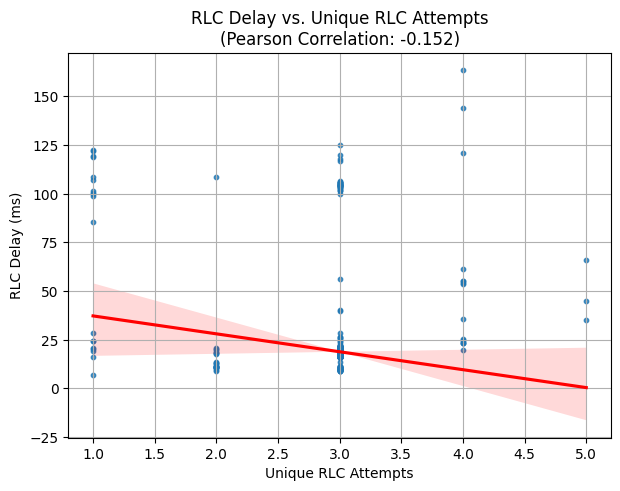

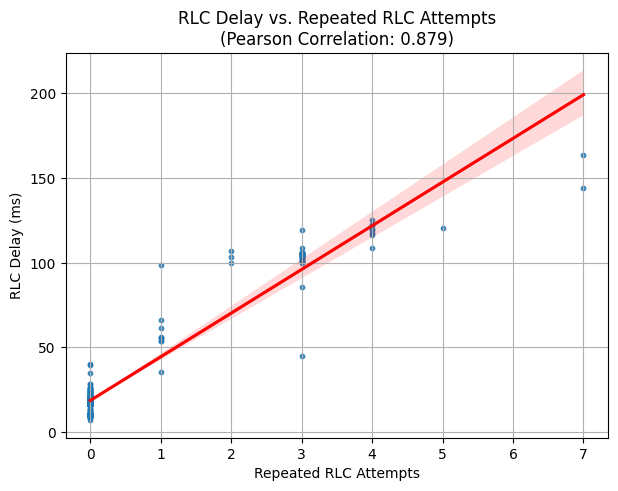

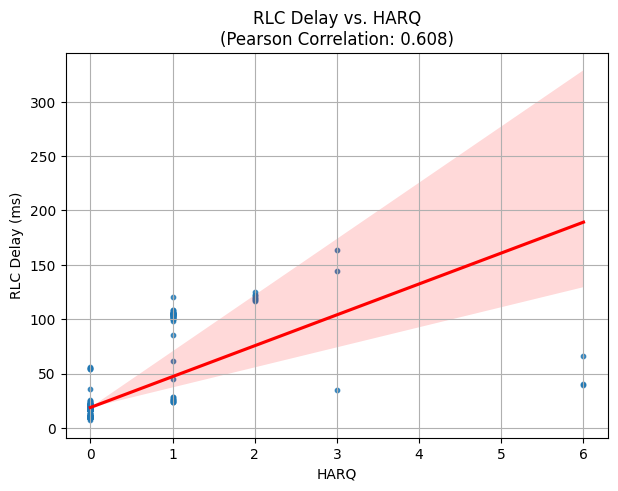

In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the JSON file
file_path = "packets.json"  # Update if needed
with open(file_path, "r") as f:
    data = json.load(f)

# Lists to store extracted data
rlc_delays = []
repeated_rlc_attempts = []
harq = []
unique_rlc_attempts = []

# Extract necessary fields
for packet in data:
    if "rlc.attempts" in packet:
        rlc_delay = (packet.get("rlc.out_t", 0) - packet.get("rlc.in_t", 0)) * 1e3  # Convert to milliseconds
        total_attempts = len(packet["rlc.attempts"])  # Total RLC attempts
        repeated_attempts = sum(1 for attempt in packet["rlc.attempts"] if attempt.get("repeated", False))
        unique_attempts = total_attempts - repeated_attempts  # Unique RLC attempts

        harq_retx = sum(
            attempt.get("hqround", 0)
            for rlc_attempt in packet["rlc.attempts"]
            if "mac.attempts" in rlc_attempt
            for attempt in rlc_attempt["mac.attempts"]
        )

        rlc_delays.append(rlc_delay)
        repeated_rlc_attempts.append(repeated_attempts)
        harq.append(harq_retx)
        unique_rlc_attempts.append(unique_attempts)

# Function to calculate Pearson correlation manually
def pearson_corr(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.corrcoef(x, y)[0, 1]  # Extract the correlation coefficient

# Compute correlations
corr1 = pearson_corr(repeated_rlc_attempts, rlc_delays)
corr2 = pearson_corr(harq, rlc_delays)
corr3 = pearson_corr(rlc_delays, unique_rlc_attempts)  # Unique RLC Attempts vs RLC Delay

# Plot Correlation: Unique RLC Attempts vs RLC Delay (RLC Delay on X-axis)
plt.figure(figsize=(7, 5))
sns.regplot(y=rlc_delays, x=unique_rlc_attempts, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title(f"RLC Delay vs. Unique RLC Attempts\n(Pearson Correlation: {corr3:.3f})")
plt.ylabel("RLC Delay (ms)")
plt.xlabel("Unique RLC Attempts")
plt.grid(True)
plt.show()

# Plot Correlation: RLC Delay vs Repeated RLC Attempts
plt.figure(figsize=(7, 5))
sns.regplot(x=repeated_rlc_attempts, y=rlc_delays, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title(f"RLC Delay vs. Repeated RLC Attempts\n(Pearson Correlation: {corr1:.3f})")
plt.xlabel("Repeated RLC Attempts")
plt.ylabel("RLC Delay (ms)")
plt.grid(True)
plt.show()

# Plot Correlation: RLC Delay vs HARQ Retransmissions
plt.figure(figsize=(7, 5))
sns.regplot(x=harq, y=rlc_delays, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title(f"RLC Delay vs. HARQ\n(Pearson Correlation: {corr2:.3f})")
plt.xlabel("HARQ")
plt.ylabel("RLC Delay (ms)")
plt.grid(True)
plt.show()




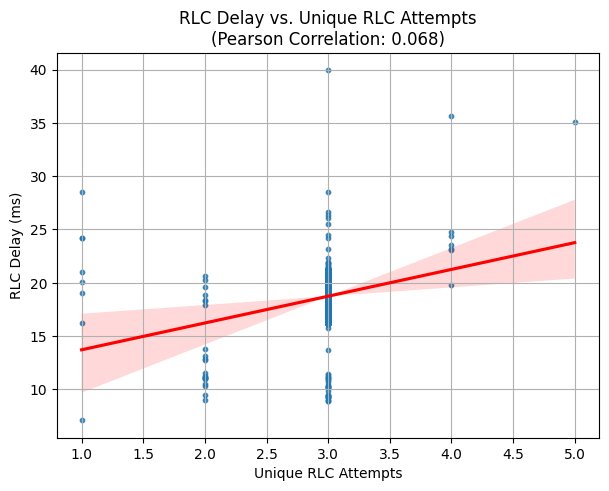

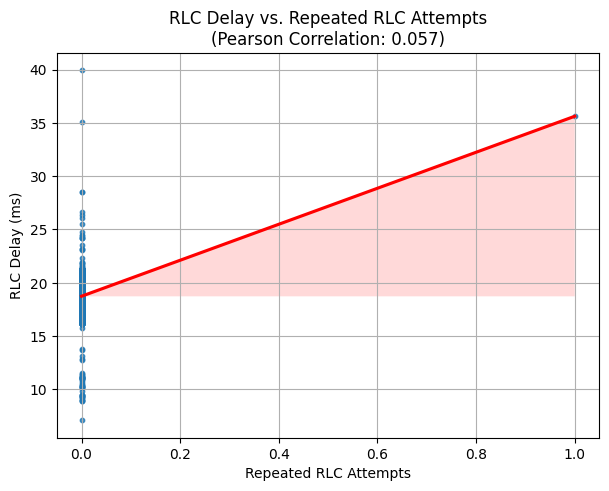

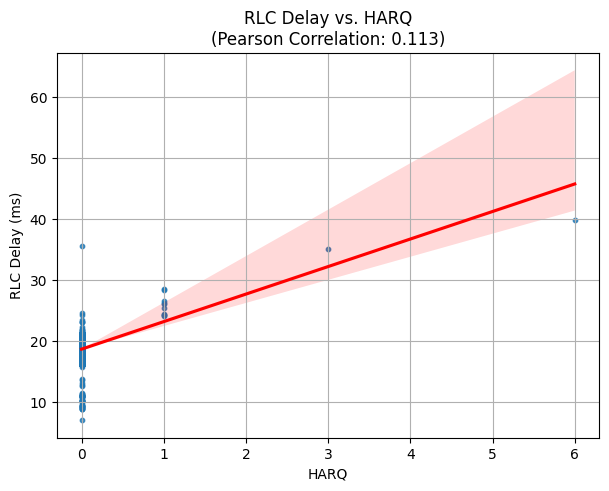

In [6]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the JSON file
file_path = "normal_packets.json"  # Update if needed
with open(file_path, "r") as f:
    data = json.load(f)

# Lists to store extracted data
rlc_delays = []
repeated_rlc_attempts = []
harq = []
unique_rlc_attempts = []

# Extract necessary fields
for packet in data:
    if "rlc.attempts" in packet:
        rlc_delay = (packet.get("rlc.out_t", 0) - packet.get("rlc.in_t", 0)) * 1e3  # Convert to milliseconds
        total_attempts = len(packet["rlc.attempts"])  # Total RLC attempts
        repeated_attempts = sum(1 for attempt in packet["rlc.attempts"] if attempt.get("repeated", False))
        unique_attempts = total_attempts - repeated_attempts  # Unique RLC attempts

        harq_retx = sum(
            attempt.get("hqround", 0)
            for rlc_attempt in packet["rlc.attempts"]
            if "mac.attempts" in rlc_attempt
            for attempt in rlc_attempt["mac.attempts"]
        )

        rlc_delays.append(rlc_delay)
        repeated_rlc_attempts.append(repeated_attempts)
        harq.append(harq_retx)
        unique_rlc_attempts.append(unique_attempts)

# Function to calculate Pearson correlation manually
def pearson_corr(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.corrcoef(x, y)[0, 1]  # Extract the correlation coefficient

# Compute correlations
corr1 = pearson_corr(repeated_rlc_attempts, rlc_delays)
corr2 = pearson_corr(harq, rlc_delays)
corr3 = pearson_corr(rlc_delays, unique_rlc_attempts)  # Unique RLC Attempts vs RLC Delay

# Plot Correlation: Unique RLC Attempts vs RLC Delay (RLC Delay on X-axis)
plt.figure(figsize=(7, 5))
sns.regplot(y=rlc_delays, x=unique_rlc_attempts, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title(f"RLC Delay vs. Unique RLC Attempts\n(Pearson Correlation: {corr3:.3f})")
plt.ylabel("RLC Delay (ms)")
plt.xlabel("Unique RLC Attempts")
plt.grid(True)
plt.show()

# Plot Correlation: RLC Delay vs Repeated RLC Attempts
plt.figure(figsize=(7, 5))
sns.regplot(x=repeated_rlc_attempts, y=rlc_delays, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title(f"RLC Delay vs. Repeated RLC Attempts\n(Pearson Correlation: {corr1:.3f})")
plt.xlabel("Repeated RLC Attempts")
plt.ylabel("RLC Delay (ms)")
plt.grid(True)
plt.show()

# Plot Correlation: RLC Delay vs HARQ Retransmissions
plt.figure(figsize=(7, 5))
sns.regplot(x=harq, y=rlc_delays, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title(f"RLC Delay vs. HARQ\n(Pearson Correlation: {corr2:.3f})")
plt.xlabel("HARQ")
plt.ylabel("RLC Delay (ms)")
plt.grid(True)
plt.show()




In [7]:
import json

def calculate_packet_delays(packet):
    # Frame Alignment Delay
    frame_alignment = packet['rlc.in_t'] - packet['ip.in_t']
    
    # Segmentation and Retransmission components
    initial_transmissions = []
    retransmission_gaps = []
    transmission_time = 0
    last_tx_end = None
    
    for rlc_attempt in packet['rlc.attempts']:
        for mac_attempt in rlc_attempt['mac.attempts']:
            # Check if both timestamps exist before calculating transmission time
            if 'phy.out_t' in mac_attempt and 'phy.in_t' in mac_attempt and mac_attempt['phy.out_t'] is not None and mac_attempt['phy.in_t'] is not None:
                transmission_time += mac_attempt['phy.out_t'] - mac_attempt['phy.in_t']
            
            # Identify initial vs retransmission attempts
            attempt_type = mac_attempt.get('hqround', 0)
            
            # Only process if phy.in_t exists
            if 'phy.in_t' in mac_attempt and mac_attempt['phy.in_t'] is not None:
                if attempt_type == 0:  # Initial transmission
                    initial_transmissions.append(mac_attempt['phy.in_t'])
                else:  # Retransmission
                    if last_tx_end is not None:
                        retransmission_gaps.append(mac_attempt['phy.in_t'] - last_tx_end)
            
            # Update last_tx_end only if phy.out_t exists
            if 'phy.out_t' in mac_attempt and mac_attempt['phy.out_t'] is not None:
                last_tx_end = mac_attempt['phy.out_t']
    
    # Segmentation Delay (time to process all initial segments)
    segmentation_delay = (max(initial_transmissions) - packet['rlc.in_t']) if initial_transmissions else 0
    
    # Retransmission Delay (sum of gaps between retx attempts)
    retransmission_delay = sum(retransmission_gaps)
    
    return {
        'sn': packet['sn'],
        'total_ip_delay': (packet['ip.out_t'] - packet['ip.in_t']) * 1000,
        'frame_alignment': frame_alignment * 1000,
        'segmentation': segmentation_delay * 1000,
        'retransmission': retransmission_delay * 1000,
        'transmission': transmission_time * 1000,
    }

def analyze_packets(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    results = []
    for packet in data:
        try:
            results.append(calculate_packet_delays(packet))
        except Exception as e:
            print(f"Error processing packet {packet.get('sn', 'unknown')}: {e}")
    
    return results

# Usage example
results = analyze_packets('packets.1000.json')

# Print results in a table format
print(f"{'SN':>5} | {'Total IP Delay (ms)':>18} | {'Frame Align (ms)':>15} | {'Segmentation (ms)':>16} | {'Retransmission (ms)':>17} | {'Transmission (ms)':>16}")
print('-' * 105)
for res in results:
    print(f"{res['sn']:>5} | {res['total_ip_delay']:>18.3f} | {res['frame_alignment']:>15.3f} | {res['segmentation']:>16.3f} | {res['retransmission']:>17.3f} | {res['transmission']:>16.3f}")


   SN | Total IP Delay (ms) | Frame Align (ms) | Segmentation (ms) | Retransmission (ms) | Transmission (ms)
---------------------------------------------------------------------------------------------------------
    0 |             20.130 |           0.353 |           18.654 |             0.000 |            4.391
    1 |             23.123 |           0.009 |           22.005 |             0.000 |            4.303
    2 |             23.182 |           0.009 |           22.016 |             0.000 |            4.330
    3 |             23.583 |           0.008 |           22.362 |             0.000 |            4.428
    4 |             19.016 |           0.006 |           17.710 |             0.000 |            3.411
    5 |             19.000 |           0.004 |           17.692 |             0.000 |            1.205
    6 |             28.512 |           0.005 |           19.789 |             6.391 |            4.420
    7 |             28.494 |           0.004 |           19.770 

In [10]:
import os, sys, gzip, json
from pathlib import Path
from loguru import logger
import pandas as pd
# from edaf.core.uplink.preprocess import preprocess_ul
# from edaf.core.uplink.analyze_packet import ULPacketAnalyzer
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

PACKET_IN_DECISION_DELAY_MIN = 10 # slots delay between decision and in packet

def get_scheduling_delay(packet, sched_sorted_dict, slots_per_frame=20, slots_duration_ms=0.5):
    idx=sched_sorted_dict.bisect_right(packet['ip.in_t']+PACKET_IN_DECISION_DELAY_MIN*slots_duration_ms*0.001)
    if idx!=None and idx < len(sched_sorted_dict):
        schedule_ts = sched_sorted_dict[sched_sorted_dict.keys()[idx]]['schedule_ts']
        return (schedule_ts-packet['ip.in_t'])*1000
    else:
        return None

def get_frame_alignment_delay(packet, sr_bsr_tx_sorted_list, slots_per_frame=20, slots_duration_ms=0.5):
    id=sr_bsr_tx_sorted_list.bisect_right(packet['ip.in_t'])
    if id!=None and id < len(sr_bsr_tx_sorted_list):
        return (sr_bsr_tx_sorted_list[id]-packet['ip.in_t'])*1000
    else:
        return None
    

def get_buffer_len(packet, bsrupd_sorted_dict, slots_per_frame=20, slots_duration_ms=0.5):
    idx=bsrupd_sorted_dict.bisect_right(packet['ip.in_t'])
    if idx!=None and idx < len(bsrupd_sorted_dict):
        return bsrupd_sorted_dict[bsrupd_sorted_dict.keys()[idx]]['len']
    else:
        return None

# delay between ip.in and first segment mac.in  
def get_queueing_delay(packet):
    min_delay = np.inf
    for rlc_seg in packet['rlc.attempts']:
        if rlc_seg.get('mac.in_t')!=None and packet.get('ip.in_t')!=None and packet.get('rlc.attempts')!=None:
            min_delay = min(min_delay, rlc_seg['mac.in_t']-packet['ip.in_t'])
        else:
            logger.error(f"Packet {packet['id']} Either mac.in_t, ip.in_t or rlc.attempts not present")
            return None
    return min_delay*1000


# delay between ip.in and first segment mac.in  - frame alignment delay
def get_queueing_delay_wo_frame_alignment_delay(packet, sr_bsr_tx_sorted_list, slots_per_frame=20, slots_duration_ms=0.5):
    queueing_delay = get_queueing_delay(packet)
    frame_alignment_delay = get_frame_alignment_delay(packet, sr_bsr_tx_sorted_list, slots_per_frame=20, slots_duration_ms=0.5)
    if queueing_delay!=None and frame_alignment_delay!=None and queueing_delay>frame_alignment_delay:
        return queueing_delay-frame_alignment_delay
    else:
        return None

# delay between ip.in and first segment mac.in  - scheduling delay
def get_queueing_delay_wo_scheduling_delay(packet, sched_sorted_dict, slots_per_frame=20, slots_duration_ms=0.5):
    queueing_delay = get_queueing_delay(packet)
    scheduling_delay = get_scheduling_delay(packet, sched_sorted_dict, slots_per_frame=20, slots_duration_ms=0.5)
    if queueing_delay!=None and scheduling_delay!=None and queueing_delay>scheduling_delay:
        return queueing_delay-scheduling_delay
    else:
        return None
            
# return ran delay in milliseconds: 
def get_ran_delay(packet):
    if packet.get('rlc.out_t')!=None and packet.get('ip.in_t')!=None:
        return (packet['rlc.out_t']-packet['ip.in_t'])*1000
    else:
        logger.error(f"Packet {packet['id']} either ip.in_t or rlc.out_t not present")
        return None

def get_ran_delay_wo_frame_alignment_delay(packet, sr_bsr_tx_sorted_list, slots_per_frame=20, slots_duration_ms=0.5):
    if get_ran_delay(packet)>0 and get_frame_alignment_delay(packet, sr_bsr_tx_sorted_list, slots_per_frame=20, slots_duration_ms=0.5)>0:
        return get_ran_delay(packet)-get_frame_alignment_delay(packet, sr_bsr_tx_sorted_list, slots_per_frame=20, slots_duration_ms=0.5)
    else:
        return None

def get_ran_delay_wo_scheduling_delay(packet, sched_sorted_dict, slots_per_frame=20, slots_duration_ms=0.5):
    if get_ran_delay(packet)>0 and get_scheduling_delay(packet, sched_sorted_dict, slots_per_frame=20, slots_duration_ms=0.5):
        return get_ran_delay(packet)-get_scheduling_delay(packet, sched_sorted_dict, slots_per_frame=20, slots_duration_ms=0.5)
    else:
        return None

def get_retx_delay_seg(packet, rlc_seg):
    max_delay, min_delay = -np.inf, np.inf
    for mac_attempt in rlc_seg['mac.attempts']:
        if mac_attempt.get('phy.in_t')!=None:
            max_delay = max(max_delay, mac_attempt['phy.in_t'])
            min_delay = min(min_delay, mac_attempt['phy.in_t'])
        else:
            logger.error(f"Packet {packet['id']} phy.in_t not present")
            return None
    return (max_delay-min_delay)*1000

def get_max_rlc_seg(packet):
    max_delay = -np.inf
    max_rlc_seg = None
    for rlc_seg in packet['rlc.attempts']:
        if len(rlc_seg['mac.attempts'])>0 and get_retx_delay_seg(packet, rlc_seg)!=None:
            if get_retx_delay_seg(packet, rlc_seg) > max_delay:
                max_delay = get_retx_delay_seg(packet, rlc_seg)
                max_rlc_seg = rlc_seg
        else:
            logger.error(f"Packet {packet['id']} mac.attempts not present")
            return None
    return  max_rlc_seg

def get_retx_delay(packet):
    max_delay = -np.inf
    max_rlc_seg = get_max_rlc_seg(packet)
    if max_rlc_seg!=None and get_retx_delay_seg(packet, max_rlc_seg)!=None:
        return get_retx_delay_seg(packet, max_rlc_seg)
    else:
        return None
    # for rlc_seg in packet['rlc.attempts']:
    #     if len(rlc_seg['mac.attempts'])>0 and get_retx_delay_seg(packet, rlc_seg)!=None:
    #         if get_retx_delay_seg(packet, rlc_seg) > max_delay:
    #             max_delay = get_retx_delay_seg(packet, rlc_seg)
    #             max_rlc_seg = rlc_seg
    #     else:
    #         logger.error(f"Packet {packet['id']} mac.attempts not present")
    #         return None, None
    # return max_delay, max_rlc_seg

# retx delay is the retx delay of the first segment

# def get_retx_delay(packet):
#     phy_in_min_t, phy_in_max_t = np.inf, -np.inf
#     for rlc_seg in packet['rlc.attempts']:
#         if rlc_seg['so']==0: # only check the first segment
#             for mac_attempt in rlc_seg['mac.attempts']:
#                 if mac_attempt['phy.in_t'] != None: 
#                     phy_in_min_t = min(phy_in_min_t,  mac_attempt['phy.in_t'])
#                     phy_in_max_t = max(phy_in_max_t, mac_attempt['phy.in_t'])
#     if phy_in_min_t<np.inf and phy_in_max_t>-np.inf:
#         return (phy_in_max_t-phy_in_min_t)*1000
#     else:
#         return None

 # tx delay of first mac attempt of first segment
# def get_tx_delay(packet):
#     for rlc_seg in packet['rlc.attempts']:
#         for mac_attempt in rlc_seg['mac.attempts']:
#              if mac_attempt.get('phy.in_t')!=None and mac_attempt.get('phy.out_t')!=None:
#                  return (mac_attempt.get('phy.out_t')-mac_attempt.get('phy.in_t'))*1000
                 
# re transmission delay of the first rlc segment
# def get_retx_delay(packet):
#     max_phy_delay = 0
#     for rlc_seg in packet['rlc.attempts']:
#         for mac_attempt in rlc_seg['mac.attempts']:
#              if mac_attempt.get('phy.in_t')!=None and mac_attempt.get('phy.out_t')!=None:
#                  pass
             
def get_tx_delay(packet):
    max_rlc_seg = get_max_rlc_seg(packet)
    max_delay = -np.inf
    for mac_attempt in max_rlc_seg['mac.attempts']:
        if mac_attempt.get('phy.in_t')!=None and mac_attempt.get('phy.out_t')!=None:
            max_delay = max(max_delay, (mac_attempt['phy.out_t']-mac_attempt['phy.in_t']))
        else:
            logger.error(f"Packet {packet['id']} phy.in_t or phy.in_t not present")
    if max_delay>-np.inf:
        return max_delay*1000
    else:
        return None
    
def get_segmentation_delay(packet):
    retx_delay = get_retx_delay(packet)
    tx_delay =  get_tx_delay(packet)
    if tx_delay!=None and retx_delay!=None and packet['rlc.in_t']!=None and packet['rlc.out_t']!=None:
        return (packet['rlc.out_t']-packet['rlc.in_t'])*1000-tx_delay-retx_delay
    else:
        return None

def get_segmentation_delay_wo_frame_alignment_delay(packet, sr_bsr_tx_sorted_list, slots_per_frame=20, slots_duration_ms=0.5):
    segmentation_delay = get_segmentation_delay(packet)
    frame_alignment_delay = get_frame_alignment_delay(packet, sr_bsr_tx_sorted_list, slots_per_frame=20, slots_duration_ms=0.5)
    if segmentation_delay!=None and frame_alignment_delay!=None and segmentation_delay>=frame_alignment_delay:
        return segmentation_delay-frame_alignment_delay
    else:
        return None
    
def get_segmentation_delay_wo_scheduling_delay(packet, sched_sorted_dict, slots_per_frame=20, slots_duration_ms=0.5):
    segmentation_delay = get_segmentation_delay(packet)
    scheduling_delay = get_scheduling_delay(packet, sched_sorted_dict, slots_per_frame=20, slots_duration_ms=0.5)
    if segmentation_delay!=None and scheduling_delay!=None and segmentation_delay>=scheduling_delay:
        return segmentation_delay-scheduling_delay
    else:
        return None
                        
def get_segments(packet):
    return len(set([rlc_seg['so'] for rlc_seg in packet['rlc.attempts']]))

def get_mcs(packet, mcs_sorted_dict, slots_per_frame=20, slots_duration_ms=0.5):
    idx=mcs_sorted_dict.bisect_right(packet['ip.in_t']+PACKET_IN_DECISION_DELAY_MIN*slots_duration_ms*0.001)
    if idx < len(mcs_sorted_dict):
        return mcs_sorted_dict[mcs_sorted_dict.keys()[idx]]['mcs']
    else:
        return None    

def get_tb(packet, tb_sorted_dict, slots_per_frame=20, slots_duration_ms=0.5):
    idx=tb_sorted_dict.bisect_right(packet['ip.in_t']+PACKET_IN_DECISION_DELAY_MIN*slots_duration_ms*0.001)
    if idx < len(tb_sorted_dict):
        return tb_sorted_dict[tb_sorted_dict.keys()[idx]]
    else:
        return None
    
# check this
def get_rlc_reassembely_delay(packet):
    return (packet['rlc.out_t']-packet['rlc.out_t'])*1000


def get_segment_attempt_delay(rlc_seg):
    return (rlc_seg['mac.out_t']-rlc_seg['mac.in_t'])*1000

def get_rlc_segment_len(rlc_seg):
    return rlc_seg['len']

def get_rlc_segment_mac_attempts(rlc_seg):
    return len(rlc_seg['mac.attempts'])


from sortedcontainers import SortedList
def build_sr_bsr_tx_sorted_list(packets):
    sr_bsr_ts_list = []
    for packet in packets:
        # Check for fields like 'sr.in_t' or 'bsr.in_t' (example names, adjust as needed)
        if 'sr.in_t' in packet and packet['sr.in_t'] is not None:
            sr_bsr_ts_list.append(packet['sr.in_t'])
        if 'bsr.in_t' in packet and packet['bsr.in_t'] is not None:
            sr_bsr_ts_list.append(packet['bsr.in_t'])
    return SortedList(sr_bsr_ts_list)


from sortedcontainers import SortedDict
def build_sched_sorted_dict(packets):
    sched_dict = SortedDict()
    for packet in packets:
        if 'sched.in_t' in packet and packet['sched.in_t'] is not None:
            # sched.in_t is used as the key; value contains the scheduling timestamp
            sched_dict[packet['sched.in_t']] = {
                'schedule_ts': packet['sched.in_t']
            }
    return sched_dict


# Load JSON file
with open('packets.1000.json', 'r') as f:
    packets = json.load(f)

sr_bsr_tx_sorted_list =  build_sr_bsr_tx_sorted_list(packets)
sched_sorted_dict = build_sched_sorted_dict(packets)

# Extract and print delays for each packet
for packet in packets:
    frame_alignment_delay = get_frame_alignment_delay(packet, sr_bsr_tx_sorted_list,  slots_per_frame=20, slots_duration_ms=0.5)
    segmentation_delay = get_segmentation_delay(packet)
    retx_delay = get_retx_delay(packet)
    scheduling_delay = get_scheduling_delay(packet,sched_sorted_dict)



    print(f"Packet ID: {packet['id']}")
    print(f"  Frame Alignment Delay: {frame_alignment_delay} ms")
    print(f"  Scheduling Delay: {scheduling_delay} ms")
    print(f"  Segmentation Delay: {segmentation_delay} ms")
    print(f"  ReTx Delay: {retx_delay} ms\n")




2025-04-10 23:01:06.724 | ERROR    | __main__:get_tx_delay:166 - Packet 39730 phy.in_t or phy.in_t not present
2025-04-10 23:01:06.726 | ERROR    | __main__:get_tx_delay:166 - Packet 39728 phy.in_t or phy.in_t not present


Packet ID: 39992
  Frame Alignment Delay: None ms
  Scheduling Delay: None ms
  Segmentation Delay: 18.62621307373047 ms
  ReTx Delay: 0.0 ms

Packet ID: 39991
  Frame Alignment Delay: None ms
  Scheduling Delay: None ms
  Segmentation Delay: 21.97718620300293 ms
  ReTx Delay: 0.0 ms

Packet ID: 39990
  Frame Alignment Delay: None ms
  Scheduling Delay: None ms
  Segmentation Delay: 22.05681800842285 ms
  ReTx Delay: 0.0 ms

Packet ID: 39989
  Frame Alignment Delay: None ms
  Scheduling Delay: None ms
  Segmentation Delay: 22.513151168823242 ms
  ReTx Delay: 0.0 ms

Packet ID: 39988
  Frame Alignment Delay: None ms
  Scheduling Delay: None ms
  Segmentation Delay: 17.912864685058594 ms
  ReTx Delay: 0.0 ms

Packet ID: 39987
  Frame Alignment Delay: None ms
  Scheduling Delay: None ms
  Segmentation Delay: 17.773866653442383 ms
  ReTx Delay: 0.0 ms

Packet ID: 39986
  Frame Alignment Delay: None ms
  Scheduling Delay: None ms
  Segmentation Delay: 19.91724967956543 ms
  ReTx Delay: 7.48